In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset = sns.load_dataset("iris")

In [6]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
indipendent_cols = [cols for cols in dataset.columns][0:-1]
dependent_cols = [cols for cols in dataset.columns if cols not in indipendent_cols]

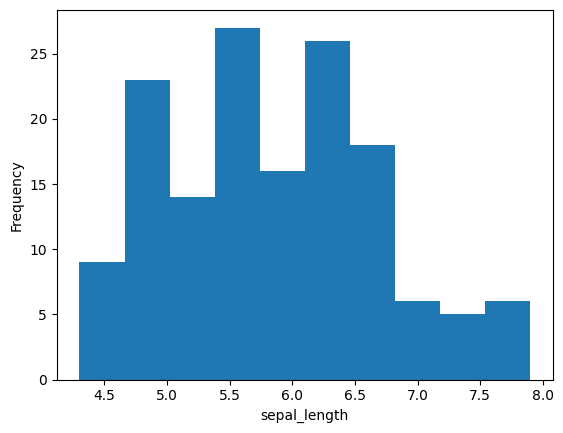

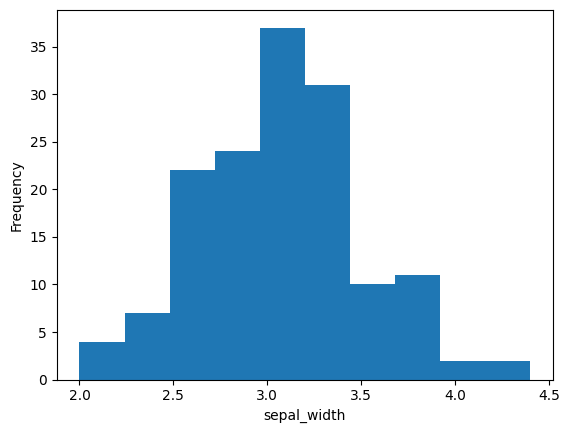

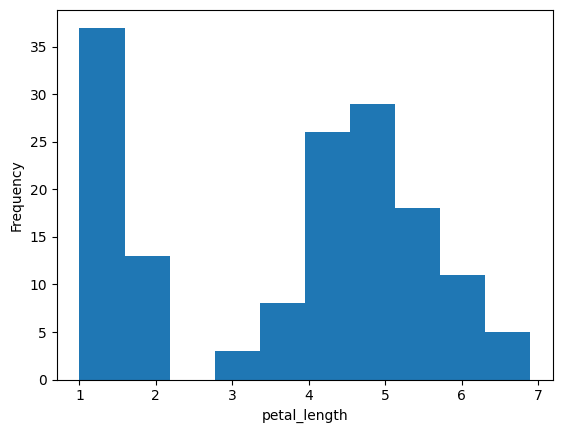

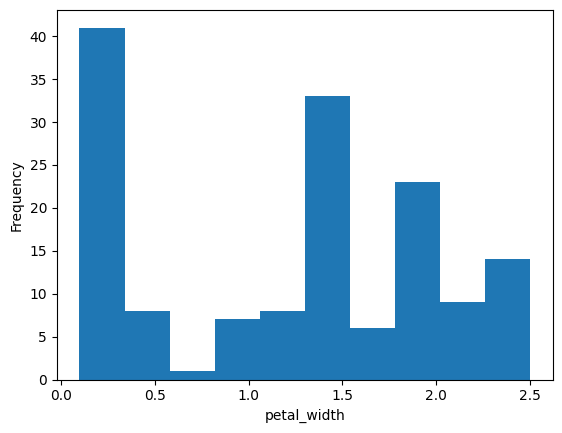

In [8]:
# Distribution of data for each columns
for cols in indipendent_cols:
    dataset[cols].plot.hist()
    plt.xlabel(cols)
    plt.show()

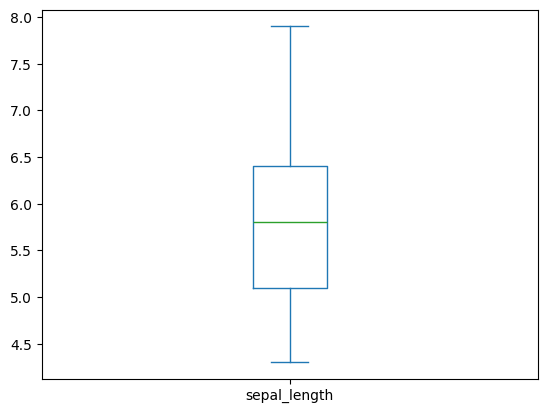

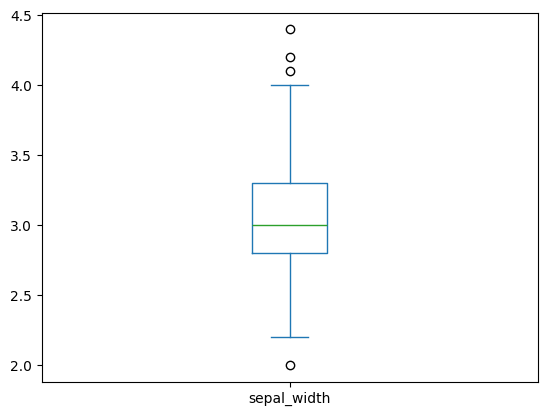

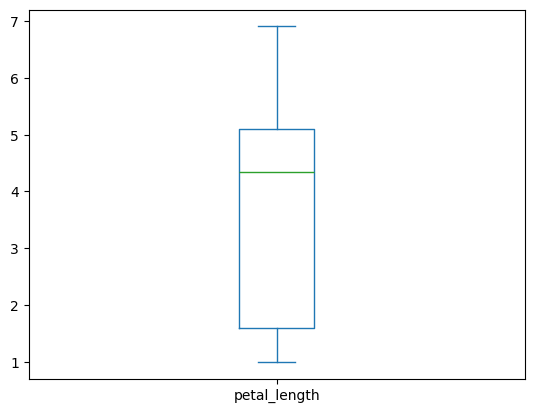

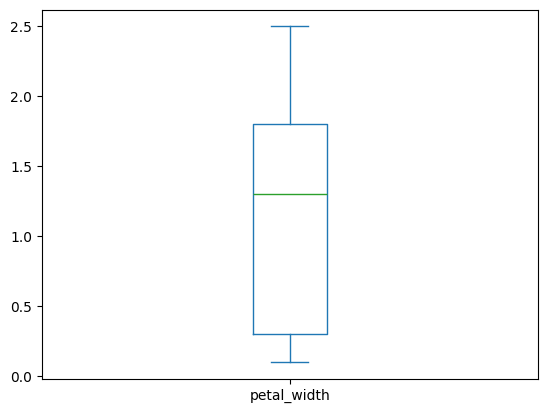

In [9]:
# Find the outliers for each columns
for cols in indipendent_cols:
    dataset[cols].plot.box()
    plt.show()

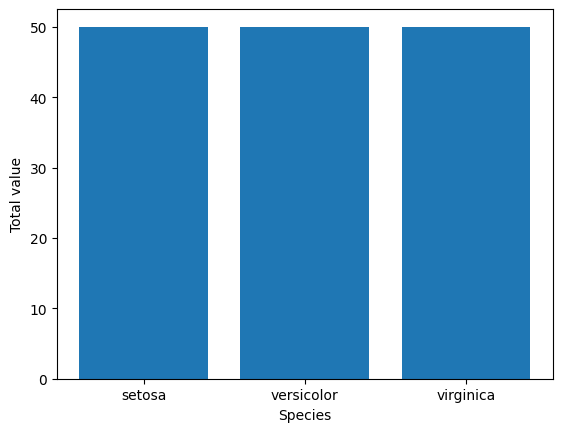

In [10]:
# Total number of each categories
plt.bar(dataset['species'].unique(),dataset['species'].value_counts())
plt.xlabel("Species")
plt.ylabel("Total value")
plt.show()

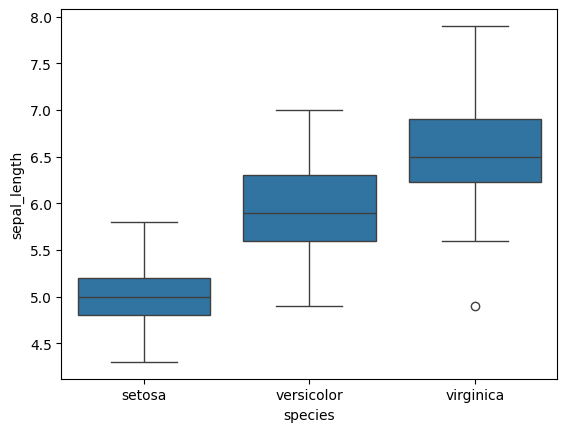

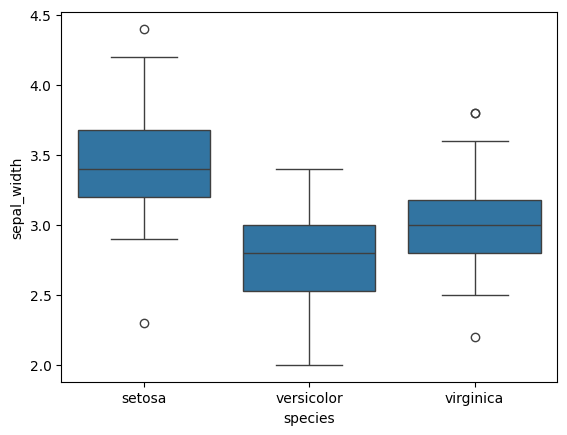

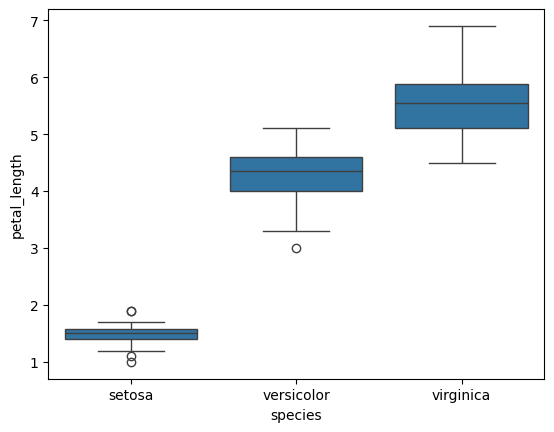

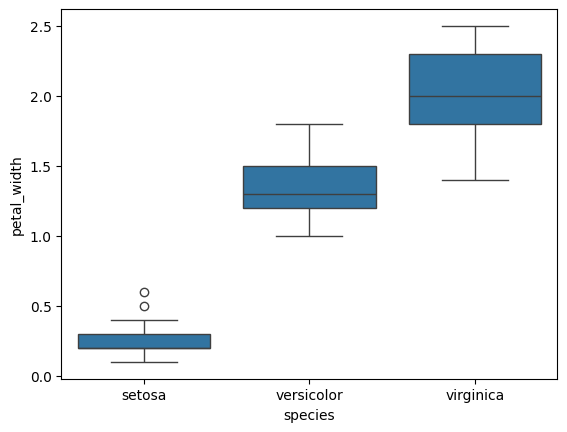

In [11]:
for cols in indipendent_cols:
    sns.boxplot(x='species',y=cols,data=dataset)
    plt.show()

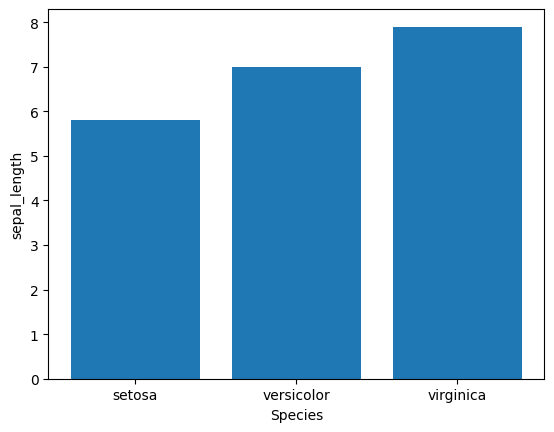

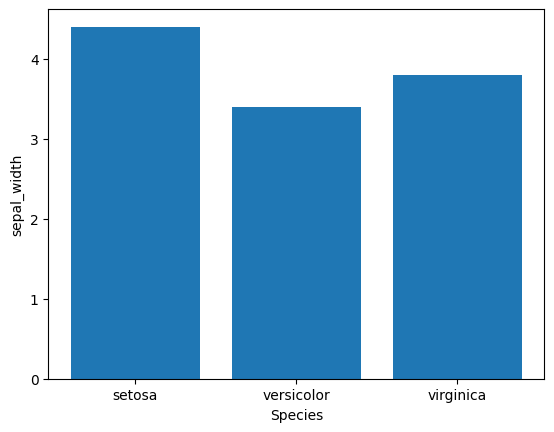

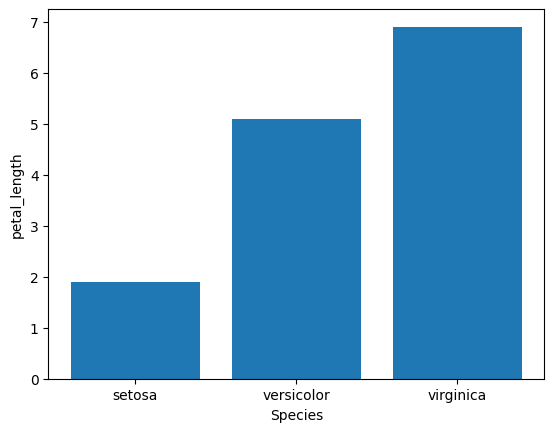

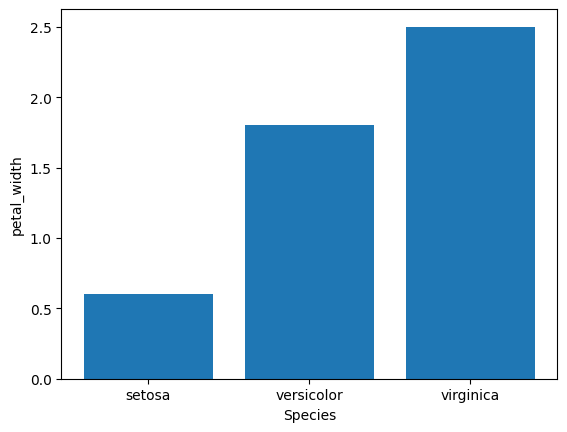

In [12]:
for cols in indipendent_cols:
    plt.bar(dataset['species'],dataset[cols])
    plt.xlabel("Species")
    plt.ylabel(cols)
    plt.show()

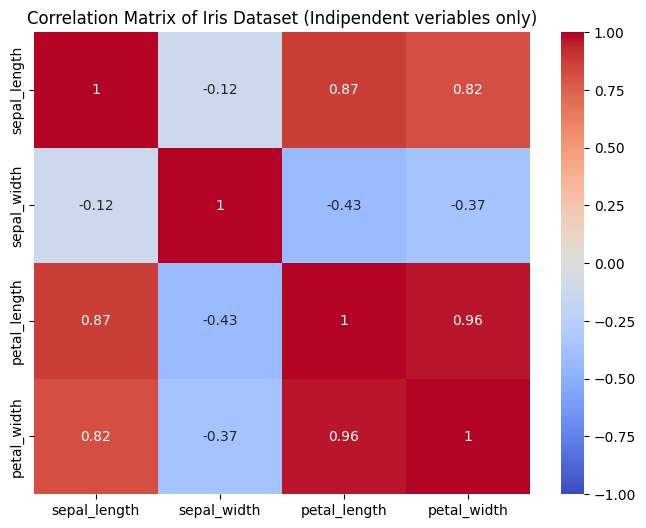

In [13]:
# Correlation between each indipendent veriables
correlation_matrix = dataset[indipendent_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Iris Dataset (Indipendent veriables only)")
plt.show()

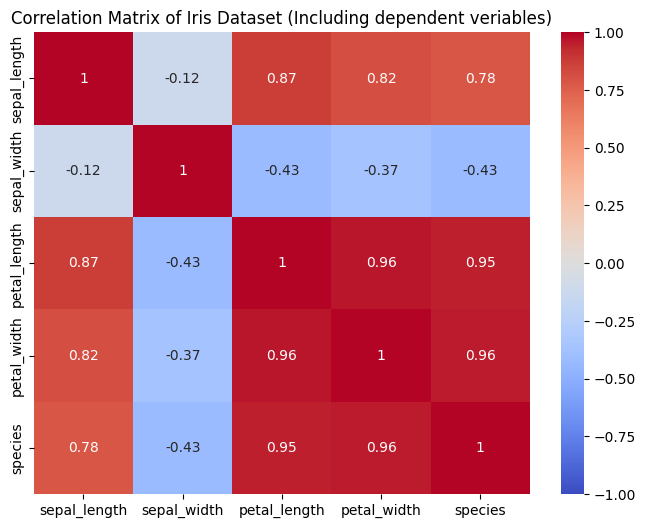

In [14]:
dataset['species'] = LabelEncoder().fit_transform(dataset['species'])

correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Iris Dataset (Including dependent veriables)")
plt.show()

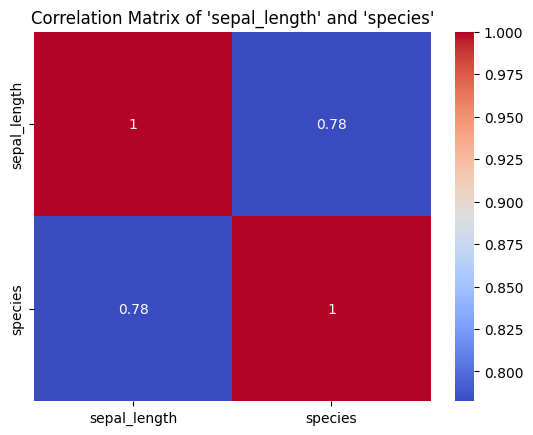

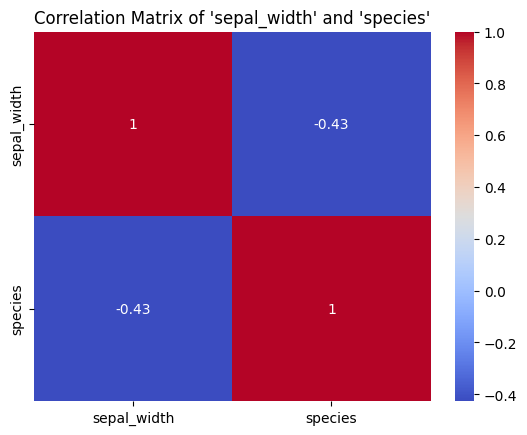

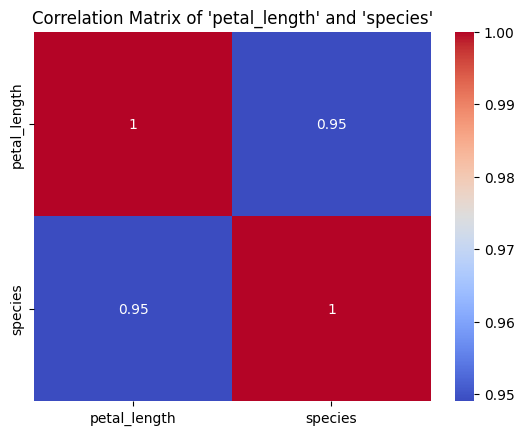

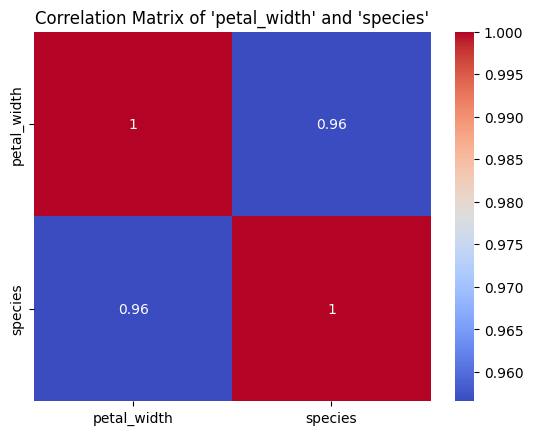

In [15]:
# For individual fetures with dependent veriable

for cols in indipendent_cols:
    target_feture = dataset[[cols,'species']].corr()
    sns.heatmap(target_feture, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix of '{cols}' and 'species'")
    plt.show()

# **Feature engineering**

In [16]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
dataset.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [18]:
# Handling outliers
def detect_outliers(data):
    outliers = []
    threshold = 3 # 3rd standard deviation

    mean = np.mean(data)
    std = np.std(data)

    # Now we will check the std of each datapoints, if it is > 3, it will be treated as outlier
    for element in data:
        z_score = (element - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(element)

    return outliers

In [21]:
feture_one_outliers = detect_outliers(dataset['sepal_length'])
feture_two_outliers = detect_outliers(dataset['sepal_width'])
feture_three_outliers = detect_outliers(dataset['petal_length'])
feture_four_outliers = detect_outliers(dataset['petal_width'])


In [20]:
dataset['sepal_width'] = np.where(dataset['sepal_width'].isin(feture_two_outliers),dataset['sepal_width'].median(),dataset['sepal_width'])

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
X = dataset[indipendent_cols]
Y = dataset[dependent_cols]

In [34]:
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()